# Canonical Discriminant Analysis (CANDISC)

In [1]:
# Chargement des librairies
import numpy as np
import pandas as pd

import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

# Chargement de la base
DTrain = pd.read_excel("Data_Illustration_Livre_ADL.xlsx",sheet_name="WINE",header=0)
DTrain.head()

,Temperature,Soleil,Chaleur,Pluie,Qualite
0,3064,1201,10,361,medium
1,3000,1053,11,338,bad
2,3155,1133,19,393,medium
3,3085,970,4,467,bad
4,3245,1258,36,294,good


In [2]:
from scientisttools.discriminant_analysis import CANDISC

In [3]:
candisc = CANDISC(n_components=2,
                  target=["Qualite"],
                  row_labels=DTrain.index,
                  features_labels=list(DTrain.columns[:-1]),
                  priors=None,
                  parallelize=False)
# Entraînement
candisc.fit(DTrain)

CANDISC(features_labels=['Temperature', 'Soleil', 'Chaleur', 'Pluie'],
        n_components=2, row_labels=RangeIndex(start=0, stop=34, step=1),
        target=['Qualite'])

In [4]:
from scientisttools.ggplot import fviz_candisc

Qualite


C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 34 rows containing missing values.
C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\guides\guides.py:253: PlotnineWarning: geom_point legend : Removed 4 rows containing missing values.


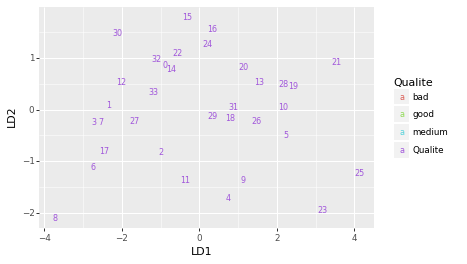

In [5]:
p = fviz_candisc(candisc)
print(p)

In [6]:
candisc.correlation_ratio_

,Sum. Intra,Sum. Inter,correlation ratio,F-stats,pvalue
Temperature,237722.1212,420067.4082,0.6386,27.3893,0.0000
Soleil,202192.3712,326909.0700,0.6179,25.0607,0.0000
Chaleur,1664.3712,1646.5700,0.4973,15.3342,0.0000
Pluie,178499.2121,97191.1702,0.3525,8.4396,0.0012


In [7]:
candisc.anova_

sum_sq    df        mean_sq          F  \
Temperature C(Qualite)  420067.408200   2.0  210033.704100  27.389310   
            Residual    237722.121212  31.0    7668.455523        NaN   
Soleil      C(Qualite)  326909.069964   2.0  163454.534982  25.060741   
            Residual    202192.371212  31.0    6522.334555        NaN   
Chaleur     C(Qualite)    1646.569964   2.0     823.284982  15.334220   
            Residual      1664.371212  31.0      53.689394        NaN   
Pluie       C(Qualite)   97191.170232   2.0   48595.585116   8.439607   
            Residual    178499.212121  31.0    5758.039101        NaN   

                              PR(>F)    eta_sq  omega_sq  
Temperature C(Qualite)  1.408416e-07  0.638605  0.608198  
            Residual             NaN       NaN       NaN  
Soleil      C(Qualite)  3.345802e-07  0.617857  0.585979  
            Residual             NaN       NaN       NaN  
Chaleur     C(Qualite)  2.344932e-05  0.497312  0.457462  
            Residual             NaN       NaN       NaN  
Pluie       C(Qualite)  1.185298e-03  0.352537  0.304408  
            Residual             NaN       NaN       NaN

In [8]:
print(candisc.manova_) # ne pas oublier d'utiliser print

                 Multivariate linear model
                                                            
------------------------------------------------------------
        Qualite         Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.2053 8.0000 56.0000  8.4505 0.0000
         Pillai's trace 0.8880 8.0000 58.0000  5.7896 0.0000
 Hotelling-Lawley trace 3.4174 8.0000 37.7500 11.7280 0.0000
    Roy's greatest root 3.2789 4.0000 29.0000 23.7717 0.0000



## Coefficients canoniques bruts

In [9]:
from scientisttools.extractfactor import get_candisc_coef

In [10]:
# Coefficients
coef = get_candisc_coef(candisc)
coef

,LD1,LD2
Temperature,0.008566,0.000046
Soleil,0.006774,0.005329
Chaleur,-0.027054,-0.127636
Pluie,-0.005866,-0.006175
Intercept,-32.876282,-2.165279


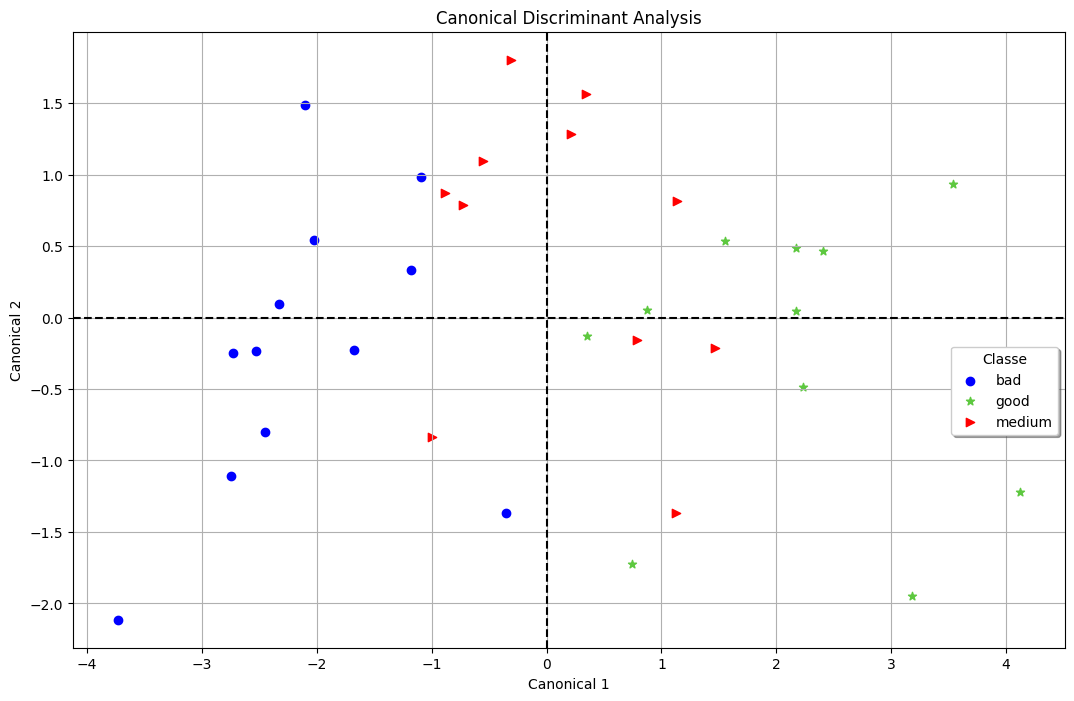

In [11]:
from scientisttools.pyplot import plotCANDISC
import matplotlib.pyplot as plt 

fig, axe =plt.subplots(figsize=(16,8))
plotCANDISC(candisc,color=["blue",'#5DC83F','red'],marker=['o',"*",'>'],ax=axe)
plt.show()

In [12]:
candisc.global_performance_

,Stat,Value,p-value
0,Wilks' Lambda,0.205263,NaN
1,Bartlett -- C(8),46.712169,1.739815e-07
2,"Rao -- F(8,56)",8.450507,1.890358e-07


In [13]:
candisc.likelihood_test_

,statistic,DDL num.,DDL den.,Pr>F
0,8.450507,8.0,56.0,1.890358e-07
1,1.339549,3.0,29.0,2.807850e-01


In [14]:
from scientisttools.extractfactor import get_candisc_var
# Covariance
pd.concat(get_candisc_var(candisc,choice="covariance"),axis=0)

Temperature        Soleil      Chaleur        Pluie
Total   Temperature  19346.750865  12360.302768  1187.420415 -5130.448097
        Soleil       12360.302768  15561.807093   795.792388 -5317.760381
        Chaleur       1187.420415    795.792388    97.380623  -356.451557
        Pluie        -5130.448097  -5317.760381  -356.451557  8108.540657
Between Temperature  12354.923771  10646.046975   766.804551 -5522.721715
        Soleil       10646.046975   9614.972646   641.521220 -5173.700666
        Chaleur        766.804551    641.521220    48.428528  -324.701111
        Pluie        -5522.721715  -5173.700666  -324.701111  2858.563830
Within  Temperature   6991.827094   1714.255793   420.615865   392.273619
        Soleil        1714.255793   5946.834447   154.271168  -144.059715
        Chaleur        420.615865    154.271168    48.952094   -31.750446
        Pluie          392.273619   -144.059715   -31.750446  5249.976827

In [15]:
# Correlation avec les axes
pd.concat(get_candisc_var(candisc,choice="correlation"),axis=0)

LD1       LD2
Total   Temperature  0.900589 -0.374779
        Soleil       0.896744  0.116190
        Chaleur      0.770513 -0.590030
        Pluie       -0.662815 -0.361294
Between Temperature  0.986524 -0.163614
        Soleil       0.998669  0.051569
        Chaleur      0.956452 -0.291891
        Pluie       -0.977208 -0.212284
Within  Temperature  0.724221 -0.584256
        Soleil       0.701280  0.176148
        Chaleur      0.525372 -0.779910
        Pluie       -0.398218 -0.420797

### Individus supplémentaires

In [16]:
## Inidvidu supplémentaire
XTest = pd.DataFrame({"Temperature" : 3000, "Soleil" : 1100, "Chaleur" : 20, "Pluie" : 300},index=[1958])
XTest

,Temperature,Soleil,Chaleur,Pluie
1958,3000,1100,20,300


In [17]:
candisc.transform(XTest)

,LD1,LD2
1958,-2.027679,-0.569395


In [18]:
candisc.decision_function(XTest)

,bad,good,medium
1958,1.114437,-7.56466,-1.859627


In [19]:
candisc.predict_proba(XTest)

,bad,good,medium
1958,0.951235,0.000162,0.048604


## Fonctions de décision

In [20]:
score_coef = get_candisc_coef(candisc,choice="score")
score_coef

,bad,good,medium
Temperature,-0.017821,0.018164,0.001277
Soleil,-0.015263,0.012925,0.003726
Chaleur,0.084484,-0.022716,-0.069449
Pluie,0.013562,-0.010768,-0.004026
Intercept,65.609287,-72.590473,-7.191833


In [21]:
XTrain = DTrain.drop(columns=["Qualite"])

In [22]:
candisc.decision_function(XTrain).head()

,bad,good,medium
0,-1.585276,-5.526406,-0.952740
1,1.586807,-8.376910,-1.562690
2,-0.974760,-5.301410,-1.843753
3,2.496957,-9.135866,-1.796625
4,-4.392974,-1.371053,-2.045149


In [23]:
candisc.predict_proba(XTrain).head()

,bad,good,medium
0,0.344613,0.006695,0.648692
1,0.958846,0.000045,0.041109
2,0.698039,0.009222,0.292739
3,0.986519,0.000009,0.013472
4,0.031256,0.641715,0.327029


In [24]:
candisc.predict(XTrain).head()

,predict
0,medium
1,bad
2,bad
3,bad
4,good


In [25]:
# score 
candisc.score(XTrain,DTrain["Qualite"])

0.7941176470588235

In [26]:
from scientisttools.extractfactor import summaryCANDISC
summaryCANDISC(candisc,to_markdown=True)

                     Canonical Discriminant Analysis - Results                     


Summary Information
|       |   Total Sample Size |   Variables |   Classes |   DF Total |   DF Within Classes |   DF Between Classes |
|:------|--------------------:|------------:|----------:|-----------:|--------------------:|---------------------:|
| value |                  34 |           4 |         3 |         33 |                  31 |                    2 |

Class Level information
|             |   n(k) |     p(k) |
|:------------|-------:|---------:|
| ('bad',)    |     12 | 0.352941 |
| ('good',)   |     11 | 0.323529 |
| ('medium',) |     11 | 0.323529 |

Importance of components
|                         |    LD1 |     LD2 |
|:------------------------|-------:|--------:|
| Variance                |  3.279 |   0.139 |
| Difference              |  3.14  | nan     |
| % of var.               | 95.945 |   4.055 |
| Cumulative of % of var. | 95.945 | 100     |

Group means:
| Qualite   |   Tem

## Backward Elimination

In [27]:
from scientisttools.discriminant_analysis import STEPDISC

stepdisc = STEPDISC(method="backward",alpha=0.01,model_train=True,verbose=True)
stepdisc.fit(candisc)

             Wilks L.  Partial L.         F   p-value
Temperature  0.213053    0.750263  4.660113  0.017906
Soleil       0.220777    0.724016  5.336596  0.010876
Chaleur      0.181627    0.880076  1.907721  0.167217
Pluie        0.205825    0.776611  4.027032  0.029030

             Wilks L.  Partial L.         F   p-value
Temperature  0.281219    0.645857  7.950792  0.001766
Soleil       0.247078    0.735102  5.225166  0.011535
Pluie        0.229942    0.789886  3.857090  0.032710

             Wilks L.  Partial L.         F   p-value
Temperature  0.358983    0.640536  8.417873  0.001254
Soleil       0.339493    0.677309  7.146457  0.002896



STEPDISC(method='backward', model_train=True)

In [28]:
stepdisc.train_model_

CANDISC(features_labels=['Temperature', 'Soleil'],
        row_labels=RangeIndex(start=0, stop=34, step=1), target=['Qualite'])

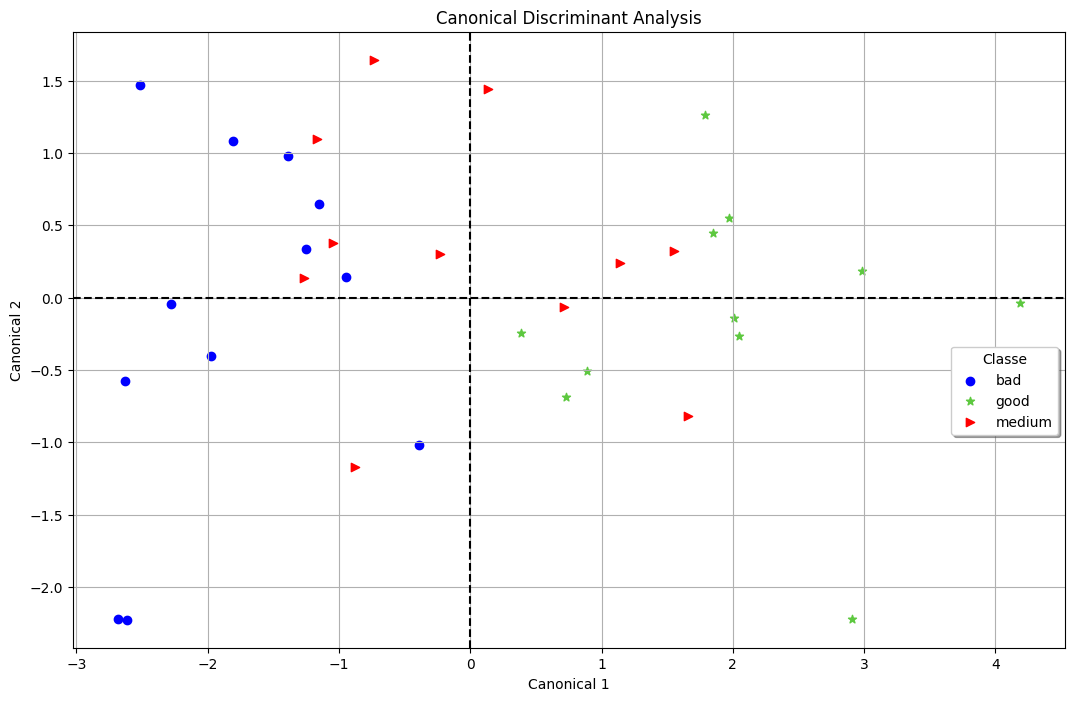

In [29]:
fig, axe =plt.subplots(figsize=(16,8))
plotCANDISC(stepdisc.train_model_,color=["blue",'#5DC83F','red'],marker=['o',"*",'>'],ax=axe)
plt.show()

In [30]:
# Summary
summaryCANDISC(stepdisc.train_model_,to_markdown=True)

                     Canonical Discriminant Analysis - Results                     


Summary Information
|       |   Total Sample Size |   Variables |   Classes |   DF Total |   DF Within Classes |   DF Between Classes |
|:------|--------------------:|------------:|----------:|-----------:|--------------------:|---------------------:|
| value |                  34 |           2 |         3 |         33 |                  31 |                    2 |

Class Level information
|             |   n(k) |     p(k) |
|:------------|-------:|---------:|
| ('bad',)    |     12 | 0.352941 |
| ('good',)   |     11 | 0.323529 |
| ('medium',) |     11 | 0.323529 |

Importance of components
|                         |    LD1 |     LD2 |
|:------------------------|-------:|--------:|
| Variance                |  2.643 |   0.053 |
| Difference              |  2.59  | nan     |
| % of var.               | 98.02  |   1.98  |
| Cumulative of % of var. | 98.02  | 100     |

Group means:
| Qualite   |   Tem